参考链接: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

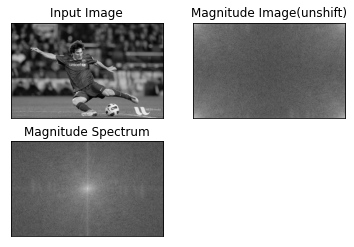

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./messi5.jpg', 0)
f = np.fft.fft2(img)  #fft2是借助FFT(快速傅里叶变换)来计算DFT(离散傅里叶变换)
fshift = np.fft.fftshift(f)  #fftshift将低频项移动到频谱图的中心,交换第一和第三象限、第二和第四象限,严格意义上讲这并不是真正的FFT,这只是一种取巧
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(20 * np.log(np.abs(f)), cmap='gray')
plt.title('Magnitude Image(unshift)')
plt.xticks([])
plt.yticks([])
plt.subplot(223)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.show()

In [2]:
img.shape

(342, 548)

Creating Sinusoidal Gratings using NumPy in Python
<br>
链接:https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

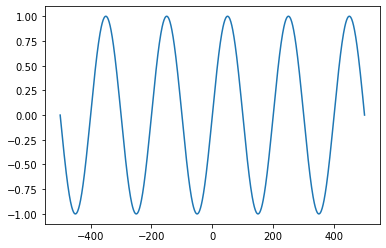

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)   #x.shape为(1001,)

wavelength = 200   # The wavelength is 200, which means that each wave will be 200 units long.
y = np.sin(2 * np.pi * x / wavelength)

plt.plot(x, y)
plt.show() #从图中发现有5个波峰(这是因为一共有1001个点,波长为200,所以使得有5个波峰)

(1001, 1001) (1001, 1001)
(1001, 1001) (1001, 1001) (1001, 1001)


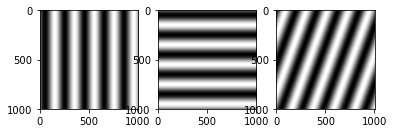

In [42]:
#把上面的那个波变成二维
from wave import Wave_read
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)   #x.shape为(1001,)

X, Y = np.meshgrid(x, x)
print(X.shape, Y.shape) #打印发现X,Y的shape都为(1001,1001)

wavelength = 200   # The wavelength is 200, which means that each wave will be 200 units long.
grating = np.sin(2 * np.pi * X / wavelength)  #X相当于将x中的每个元素都增加了1000个
another_grating = np.sin(2 * np.pi * Y / wavelength)

angle = np.pi / 9
third_grating = np.sin(
    2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength
)

print(grating.shape, another_grating.shape, third_grating.shape)

plt.subplot(131)
plt.imshow(grating, cmap='gray')

plt.subplot(132)
plt.imshow(another_grating, cmap='gray')

plt.subplot(133)
plt.imshow(third_grating, cmap='gray')
plt.show()

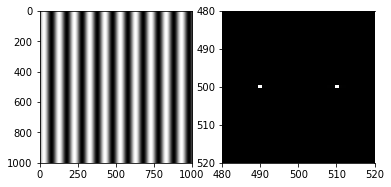

In [53]:
#进行傅里叶变换
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 100   #波长与频率成反比关系,波长越短,频率越高
angle = 0
grating = np.sin(
    2 * np.pi * (X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

plt.subplot(121)
plt.imshow(grating, cmap='gray')

#做傅里叶变换
ft = np.fft.fft2(grating)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft), cmap='gray')
plt.xlim([480,520])  #plt.xlim显示的是x轴的作图范围,注意与plt.xticks区分(后者表达的是x轴刻度内容的范围)
plt.ylim([520,480])  #之所以划定这个范围原因是原图大小是1001*1001,而图像的中心位置为(500,500),所以为了显示图像的中心位置,所以这样划分作图范围.
plt.show()   #调整波长发现,当波长变小时,两个白点的距离会变远.(白点始终是对称的)

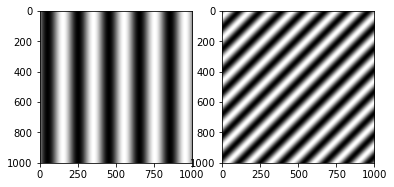

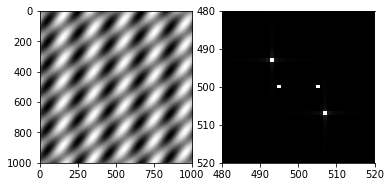

In [54]:
#进行傅里叶变换
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength_1 = 200   #波长与频率成反比关系,波长越短,频率越高
angle_1 = 0
grating_1 = np.sin(
    2 * np.pi * (X*np.cos(angle) + Y*np.sin(angle)) / wavelength_1
)

wavelength_2 = 100   #波长与频率成反比关系,波长越短,频率越高
angle_2 = np.pi / 4
grating_2 = np.sin(
    2 * np.pi * (X*np.cos(angle_2) + Y*np.sin(angle_2)) / wavelength_2
)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating_1)
plt.subplot(122)
plt.imshow(grating_2)
plt.show()

#将这两种不同频率的波叠加
gratings = grating_1 + grating_2

#做傅里叶变换
ft = np.fft.fft2(gratings)
ft = np.fft.fftshift(ft)

plt.figure()
plt.subplot(121)
plt.imshow(gratings)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480,520])  
plt.ylim([520,480])  
plt.show()    #发现有两对对称的点,说明有两种不同大小的频率

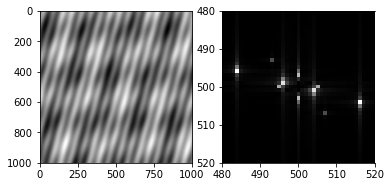

In [60]:
#更多的不同频率的波进行叠加
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi / 4, np.pi / 9, np.pi / 2, np.pi / 12

gratings = np.zeros(X.shape)
for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(
        2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / w_len
    )

#做傅里叶变换
# ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(gratings)
ft = np.fft.fftshift(ft)


plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(gratings)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480,520])  
plt.ylim([520,480])  
plt.show()   #

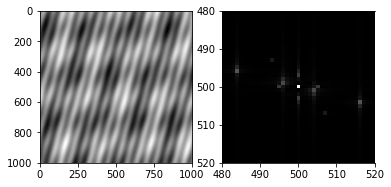

In [65]:
#更多的不同频率的波进行叠加
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi / 4, np.pi / 9, np.pi / 2, np.pi / 12

gratings = np.zeros(X.shape)
for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(
        2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / w_len
    )


#加上一个常量项
gratings += 1.25

#做傅里叶变换
# ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(gratings)
ft = np.fft.fftshift(ft)


plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(gratings)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480,520])  
plt.ylim([520,480])  
plt.show()   #加上一个常量时发现中心多了一个点,由此得出结论:频谱图中心点就对应常量项

#### 将真实世界中的一个图像做傅里叶变换

(301, 301)


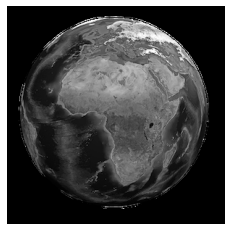

In [67]:
#这里先简化一下,将读取的图像转化为灰度图像,这样它就变成了一个二维数组,和前面的那些波图像就一样了

import matplotlib.pyplot as plt

img_filename = "./Earth.png"

image = plt.imread(img_filename)
image = image[:,:,:3].mean(axis=2) #mean(axis=2)表示在2这个维度上取平均值,经过这个操作后图像就变为了两维
print(image.shape)   #打印发现shape为(301,301)

plt.set_cmap("gray")
plt.imshow(image)
plt.axis("off")
plt.show()

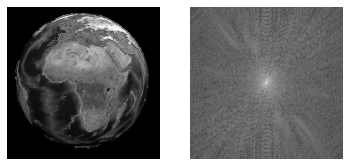

In [7]:
#对图像做2D傅里叶变换
import numpy as np
from matplotlib import pyplot as plt

def calculate_2dfft(input):
    ft = np.fft.fft2(input)
    ft = np.fft.fftshift(ft)
    return ft

#读取图像并转换为灰度图像
img_filename = './Earth.png'
image = plt.imread(img_filename)
image = image[:,:,:3].mean(axis=2)  #这个相当于将RGB对应的三个值平均化

plt.set_cmap("gray")

ft = calculate_2dfft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
#这里使用np.log的原因:为了更好的展示.如果没有它,中心点的常量项会比其他点都要亮,显示出来的效果就变成了只有中心点亮,其他点都显示为黑色
plt.imshow(np.log(abs(ft)))   #ft其实是由复数组成的,abs操作可以取该复数的模,这里复数的模相当于幅值
plt.axis("off")
plt.show()


#### 功率谱的实现
下面这幅图是1D Power Spectrum的实现,除此之外还有2D,可以参考[此链接](https://www.astrobetter.com/blog/2010/03/03/fourier-transforms-of-images-in-python/).
下面这个代码是直接照搬的这个[链接](https://github.com/cc-hpc-itwm/UpConv/blob/master/Experiments_Codes/Visualization.ipynb)来做的.

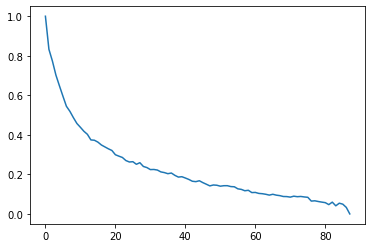

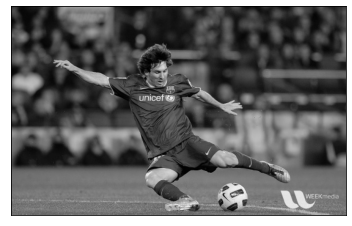

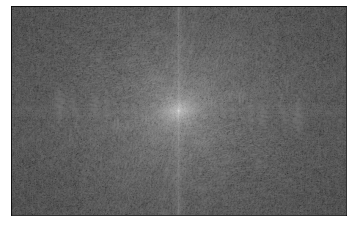

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import radialProfile
from scipy.interpolate import griddata
from PIL import Image

N = 88
epsilon = 1e-8

#real
psd1D_org = np.zeros(N)

img = cv2.imread('./messi5.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift += epsilon
magnitude_spectrum = 20 * np.log(np.abs(fshift))

psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
points = np.linspace(0, N, num=psd1D.size)
xi = np.linspace(0, N, num=N)
interpolated = griddata(points, psd1D, xi, method='cubic')

interpolated = (interpolated-np.min(interpolated))/(np.max(interpolated)-np.min(interpolated))
psd1D_org = interpolated

x = np.arange(0, N, 1)

plt.plot(x, psd1D_org, label='real')
plt.show()
plt.imshow(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

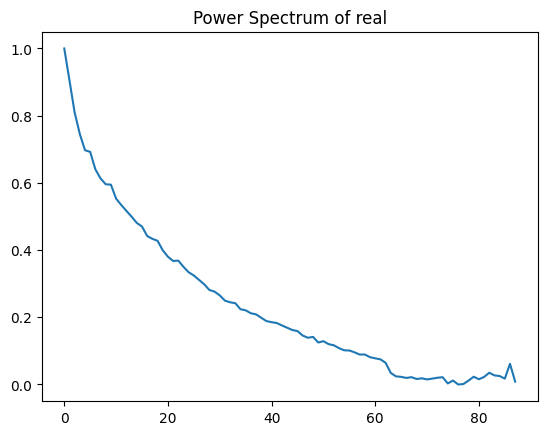

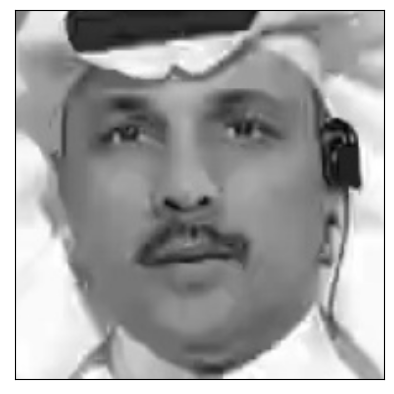

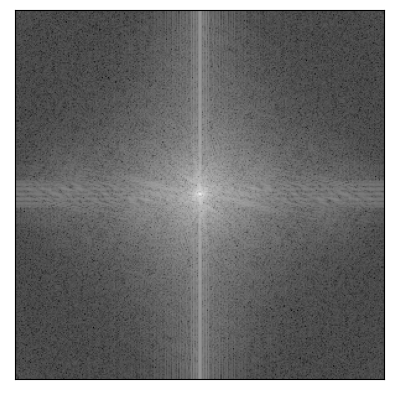

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import radialProfile
from scipy.interpolate import griddata
from PIL import Image
%matplotlib inline

N = 88
epsilon = 1e-8

#real
psd1D_org = np.zeros(N)

img = cv2.imread('./real.jpg',0)
img = cv2.resize(img, (299,299))
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift += epsilon
magnitude_spectrum = 20 * np.log(np.abs(fshift))

psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
points = np.linspace(0, N, num=psd1D.size)
xi = np.linspace(0, N, num=N)
interpolated = griddata(points, psd1D, xi, method='cubic')

interpolated = (interpolated-np.min(interpolated))/(np.max(interpolated)-np.min(interpolated))
psd1D_org = interpolated

x = np.arange(0, N, 1)


plt.plot(x, psd1D_org, label='real')
plt.title('Power Spectrum of real')
plt.show()
plt.imshow(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

#### 高通滤波
http://accu.cc/content/pil/frequency_filter_hpf/
<br>
https://milesching.github.io/posts/image_processing/%E5%9B%BE%E5%83%8F%E5%A4%84%E7%90%86%E5%AD%A6%E4%B9%A0%E7%AC%94%E8%AE%B003/

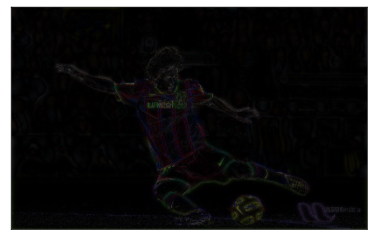

In [11]:
# 实验代码
import numpy as np
import PIL.Image
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def convert_2d(r):
    r_ext = np.zeros((r.shape[0] * 2, r.shape[1] * 2))
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            r_ext[i][j] = r[i][j]

    r_ext_fu = np.fft.fft2(r_ext)  #shape:(684, 1096)
    r_ext_fu = np.fft.fftshift(r_ext_fu)

    # 截止频率为 20
    d0 = 20
    # 2 阶巴特沃斯
    n = 2
    # 频率域中心坐标
    center = (r_ext_fu.shape[0] // 2, r_ext_fu.shape[1] // 2) #(342,548)
    h = np.empty(r_ext_fu.shape)  #shape:(684, 1096)
    # 绘制滤波器 H(u, v)
    for u in range(h.shape[0]):
        for v in range(h.shape[1]):
            duv = ((u - center[0]) ** 2 + (v - center[1]) ** 2) ** 0.5
            if duv == 0:
                h[u][v] = 0
            else:
                h[u][v] = 1 / ((1 + (d0 / duv)) ** (2*n))

    s_ext_fu = r_ext_fu * h   #进行两个矩阵的逐渐元素相乘
    s_ext = np.fft.ifft2(np.fft.ifftshift(s_ext_fu))   # TODO 这里在逆变换前也要先进行ifftshift变换,why? --> 这里目的是还原移位.
    s_ext = np.abs(s_ext)
    s = s_ext[0:r.shape[0], 0:r.shape[1]]

    for i in range(s.shape[0]):
        for j in range(s.shape[1]):
            s[i][j] = min(max(s[i][j], 0), 255)   #将取绝对值后大于255的值给定为255

    return s.astype(np.uint8)


def convert_3d(r):
    s_dsplit = []
    for d in range(r.shape[2]):  #r.shape[2]获得通道数
        rr = r[:, :, d]  #shape:(342, 548)  #活动每个通道的图像
        ss = convert_2d(rr)
        s_dsplit.append(ss)
    #以后可以采用下面这种方法将三个通道的图像起来形成一张三通道的图像
    s = np.dstack(s_dsplit)   #shape:(342, 548, 3),np.dstack的作用就是将数组按顺序堆叠,因为s_dsplit是个长度为3的数组,所以堆叠后shape为2的位置为3
    return s


im = PIL.Image.open('messi5.jpg')  #size:(548, 342)
im_mat = np.asarray(im)  #shape:(342, 548, 3)
im_converted_mat = convert_3d(im_mat)  #shape:(342, 548, 3)
im_converted = PIL.Image.fromarray(im_converted_mat)  #把它转为Image

plt.imshow(im_converted)
plt.xticks([]), plt.yticks([])
plt.show()

#### 查看Deepfakes, Face2Face, FaceSwap, NeuralTextures数据集对应的功率谱图像

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
import radialProfile
import glob
import cv2
from scipy.interpolate import griddata


data_path = '/data/dataset/FF++_std_c40_300frames_withface/valid'

modes = ['real', 'fake']
manipulations = ['Deepfakes', 'Face2Face', 'FaceSwap', 'NeuralTextures']

#config
N = 88
epsilon = 1e-8
number_iter = 140
psd1D_total = np.zeros([number_iter, N])
y = []
error = []


def RGB2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

for mode in modes:
    if mode == 'fake':
        for manipulation in manipulations:
            cur_path = os.path.join(data_path, mode)
            cur_path = os.path.join(cur_path, manipulation)
            folders = os.listdir(cur_path)
            cont = 0
            psd1D_org_mean = np.zeros(N)
            psd1D_org_std = np.zeros(N)
            for folder in folders:
                file_path = os.path.join(cur_path, folder)
                file_path = os.path.join(file_path, 'frame0.jpg')
                img = cv2.imread(file_path,0)
                f = np.fft.fft2(img)
                fshift = np.fft.fftshift(f)
                fshift += epsilon
                magnitude_spectrum = 20*np.log(np.abs(fshift))
                # Calculate the azimuthally averaged 1D power spectrum
                psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
                # Calculate the azimuthally averaged 1D power spectrum
                points = np.linspace(0,N,num=psd1D.size) # coordinates of a
                xi = np.linspace(0,N,num=N) # coordinates for interpolation
                interpolated = griddata(points,psd1D,xi,method='cubic')
                interpolated = (interpolated-np.min(interpolated))/(np.max(interpolated)-np.min(interpolated))
                psd1D_total[cont,:] = interpolated
                cont += 1
                if cont == number_iter:
                    break
            for x in range(N):
                psd1D_org_mean[x] = np.mean(psd1D_total[:,x])
                psd1D_org_std[x] = np.std(psd1D_total[:,x])
            y.append(psd1D_org_mean)
            error.append(psd1D_org_std)
            print(manipulation,'done')
        
    else:
        cur_path = os.path.join(data_path, mode)
        folders = os.listdir(cur_path)
        cont = 0
        psd1D_org_mean = np.zeros(N)
        psd1D_org_std = np.zeros(N)
        for folder in folders:
            file_path = os.path.join(cur_path, folder)
            file_path = os.path.join(file_path, 'frame0.jpg')
            img = cv2.imread(file_path,0)
            f = np.fft.fft2(img)
            fshift = np.fft.fftshift(f)
            fshift += epsilon
            magnitude_spectrum = 20*np.log(np.abs(fshift))
            # Calculate the azimuthally averaged 1D power spectrum
            psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
            # Calculate the azimuthally averaged 1D power spectrum
            points = np.linspace(0,N,num=psd1D.size) # coordinates of a
            xi = np.linspace(0,N,num=N) # coordinates for interpolation
            interpolated = griddata(points,psd1D,xi,method='cubic')
            interpolated = (interpolated-np.min(interpolated))/(np.max(interpolated)-np.min(interpolated))
            psd1D_total[cont,:] = interpolated
            cont += 1
            if cont == number_iter:
                break
        for x in range(N):
            psd1D_org_mean[x] = np.mean(psd1D_total[:,x])
            psd1D_org_std[x] = np.std(psd1D_total[:,x])
        y.append(psd1D_org_mean)
        error.append(psd1D_org_std)
        print('real done')

real done
Deepfakes done
Face2Face done
FaceSwap done
NeuralTextures done


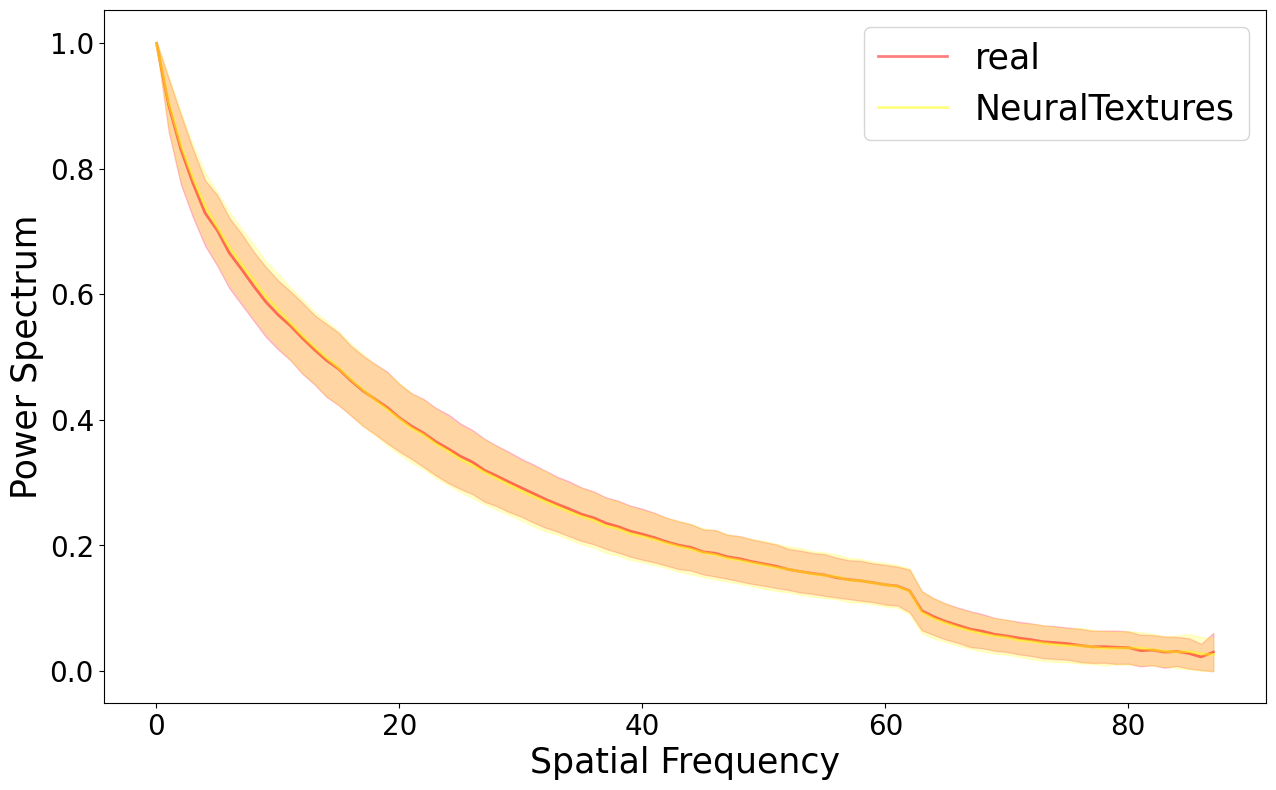

In [43]:
x = np.arange(0, N, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, y[0], alpha=0.5, color='red', label='real', linewidth =2.0)
ax.fill_between(x, y[0] - error[0], y[0] + error[0], color='red', alpha=0.2)

# ax.plot(x, y[1], alpha=0.5, color='blue', label='Deepfakes', linewidth = 2.0)
# ax.fill_between(x, y[1] - error[1], y[1] + error[1], color='blue', alpha=0.2)

# ax.plot(x, y[2], alpha=0.5, color='green', label='Face2Face', linewidth = 2.0)
# ax.fill_between(x, y[2] - error[2], y[2] + error[2], color='green', alpha=0.2)

# ax.plot(x, y[3], alpha=0.5, color='black', label='FaceSwap', linewidth = 2.0)
# ax.fill_between(x, y[3] - error[3], y[3] + error[3], color='black', alpha=0.2)

ax.plot(x, y[4], alpha=0.5, color='yellow', label='NeuralTextures', linewidth = 2.0)
ax.fill_between(x, y[4] - error[4], y[4] + error[4], color='yellow', alpha=0.2)


plt.xlabel('Spatial Frequency', fontsize=25)
plt.ylabel('Power Spectrum', fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

ax.legend(loc='best', prop={'size': 25})

#### 查看CelebDF-v2数据集中真实图像与伪造图像的功率谱图像

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os
import radialProfile
import glob
import cv2
from scipy.interpolate import griddata


data_path = '/data/dataset/Celeb_DF_300frames_withface/test'

modes = ['real', 'fake']


#config
N = 88
epsilon = 1e-8
number_iter = 140
psd1D_total = np.zeros([number_iter, N])
y = []
error = []


def RGB2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

for mode in modes:
    if mode == 'fake':
        cur_path = os.path.join(data_path, mode)
        folders = os.listdir(cur_path)
        cont = 0
        psd1D_org_mean = np.zeros(N)
        psd1D_org_std = np.zeros(N)
        for folder in folders:
            file_path = os.path.join(cur_path, folder)
            file_path = os.path.join(file_path, 'frame0.jpg')
            img = cv2.imread(file_path,0)
            f = np.fft.fft2(img)
            fshift = np.fft.fftshift(f)
            fshift += epsilon
            magnitude_spectrum = 20*np.log(np.abs(fshift))
            # Calculate the azimuthally averaged 1D power spectrum
            psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
            # Calculate the azimuthally averaged 1D power spectrum
            points = np.linspace(0,N,num=psd1D.size) # coordinates of a
            xi = np.linspace(0,N,num=N) # coordinates for interpolation
            interpolated = griddata(points,psd1D,xi,method='cubic')
            interpolated = (interpolated-np.min(interpolated))/(np.max(interpolated)-np.min(interpolated))
            psd1D_total[cont,:] = interpolated
            cont += 1
            if cont == number_iter:
                break
        for x in range(N):
            psd1D_org_mean[x] = np.mean(psd1D_total[:,x])
            psd1D_org_std[x] = np.std(psd1D_total[:,x])
        y.append(psd1D_org_mean)
        error.append(psd1D_org_std)
        print('fake done')
        
    else:
        cur_path = os.path.join(data_path, mode)
        folders = os.listdir(cur_path)
        cont = 0
        psd1D_org_mean = np.zeros(N)
        psd1D_org_std = np.zeros(N)
        for folder in folders:
            file_path = os.path.join(cur_path, folder)
            file_path = os.path.join(file_path, 'frame0.jpg')
            img = cv2.imread(file_path,0)
            f = np.fft.fft2(img)
            fshift = np.fft.fftshift(f)
            fshift += epsilon
            magnitude_spectrum = 20*np.log(np.abs(fshift))
            # Calculate the azimuthally averaged 1D power spectrum
            psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
            # Calculate the azimuthally averaged 1D power spectrum
            points = np.linspace(0,N,num=psd1D.size) # coordinates of a
            xi = np.linspace(0,N,num=N) # coordinates for interpolation
            interpolated = griddata(points,psd1D,xi,method='cubic')
            interpolated = (interpolated-np.min(interpolated))/(np.max(interpolated)-np.min(interpolated))
            psd1D_total[cont,:] = interpolated
            cont += 1
            if cont == number_iter:
                break
        for x in range(N):
            psd1D_org_mean[x] = np.mean(psd1D_total[:,x])
            psd1D_org_std[x] = np.std(psd1D_total[:,x])
        y.append(psd1D_org_mean)
        error.append(psd1D_org_std)
        print('real done')

real done
fake done


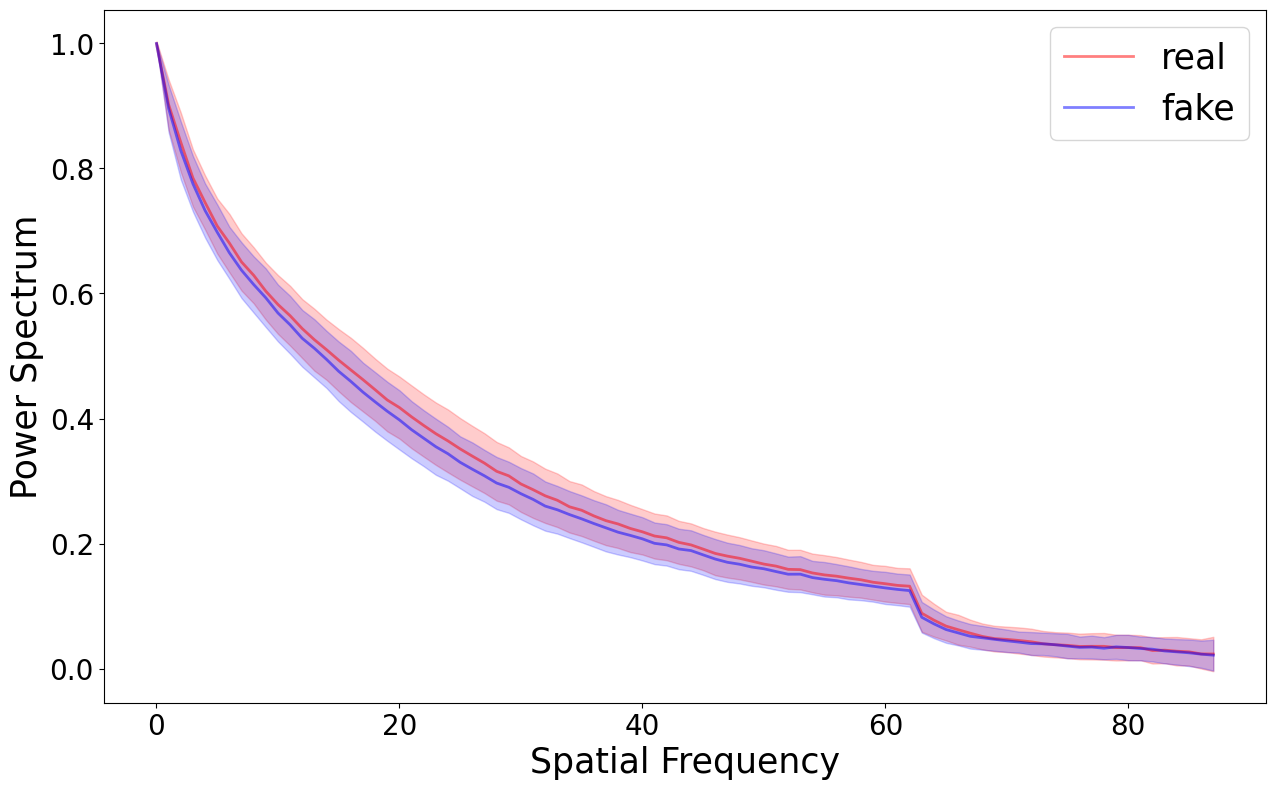

In [48]:
x = np.arange(0, N, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, y[0], alpha=0.5, color='red', label='real', linewidth =2.0)
ax.fill_between(x, y[0] - error[0], y[0] + error[0], color='red', alpha=0.2)

ax.plot(x, y[1], alpha=0.5, color='blue', label='fake', linewidth = 2.0)
ax.fill_between(x, y[1] - error[1], y[1] + error[1], color='blue', alpha=0.2)


plt.xlabel('Spatial Frequency', fontsize=25)
plt.ylabel('Power Spectrum', fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

ax.legend(loc='best', prop={'size': 25})